<a href="https://colab.research.google.com/github/RaiGon84/Pytorch-Tutorial/blob/main/intro_to_pytorch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
class Model(nn.Module):

  def __init__(self,in_features=4,h1=14,h2=4,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [21]:
torch.manual_seed(41)

model = Model()

In [22]:
# Extract data from website
url = 'https://gist.githubusercontent.com/Thanatoz-1/9e7fdfb8189f0cdf5d73a494e4a6392a/raw/aaecbd14aeaa468cd749528f291aa8a30c2ea09e/iris_dataset.csv'
my_df = pd.read_csv(url)

In [23]:
# Change last column from Strings to Floats
my_df['target'] = my_df['target'].replace('Iris-setosa',0.0)
my_df['target'] = my_df['target'].replace('Iris-versicolor',1.0)
my_df['target'] = my_df['target'].replace('Iris-virginica',2.0)

/tmp/ipython-input-115233387.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['target'] = my_df['target'].replace('Iris-virginica',2.0)


In [24]:
# Train Test Split! Set X, y
X = my_df.drop('target',axis=1)
y = my_df['target']

In [25]:
# Convert to numpy arrays
X = X.values
y = y.values

In [26]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [27]:
# Convert features and labels to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [28]:
# Set criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [29]:
# Train model
epochs = 100
losses = []
for i in range(epochs):
  # Go forward
  y_pred = model.forward(X_train)

  # Measure error
  loss = criterion(y_pred,y_train)

  # Keep track of the loss
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do Back Propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.1873154640197754
Epoch: 10 and loss: 0.9146408438682556
Epoch: 20 and loss: 0.6643141508102417
Epoch: 30 and loss: 0.4575275480747223
Epoch: 40 and loss: 0.33774861693382263
Epoch: 50 and loss: 0.233320951461792
Epoch: 60 and loss: 0.14822569489479065
Epoch: 70 and loss: 0.09701802581548691
Epoch: 80 and loss: 0.07047801464796066
Epoch: 90 and loss: 0.05626385286450386


Text(0.5, 0, 'Epoch')

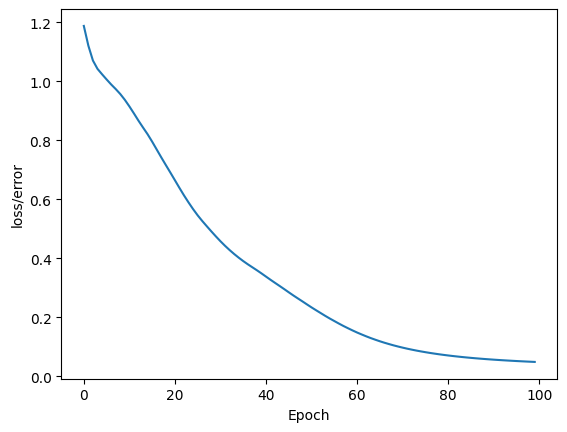

In [30]:
# Graph
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [31]:
# Evaluate model
with torch.no_grad(): # Turn-off back-prop
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [32]:
loss

tensor(0.1318)

In [33]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'Correct {correct*100/30} %')


1.) tensor([-4.2091,  6.8298,  9.5511]) 	 2 	 2
2.) tensor([-6.7373,  7.2761, 13.8484]) 	 2 	 2
3.) tensor([-6.5102,  8.2826, 13.7635]) 	 2 	 2
4.) tensor([-0.4917,  7.2014,  3.5280]) 	 1 	 1
5.) tensor([-5.2417,  7.6303, 11.4841]) 	 2 	 2
6.) tensor([1.5868, 7.0906, 0.0687]) 	 1 	 1
7.) tensor([-3.4710,  7.1668,  8.4310]) 	 2 	 2
8.) tensor([-0.2909,  7.2353,  3.2067]) 	 1 	 1
9.) tensor([-4.3317,  7.4111,  9.9205]) 	 2 	 2
10.) tensor([-7.0339,  7.7017, 14.4599]) 	 2 	 2
11.) tensor([-3.1924,  7.1421,  7.9644]) 	 2 	 2
12.) tensor([ 13.0536,   7.3572, -18.7631]) 	 0 	 0
13.) tensor([ 11.6751,   6.6422, -16.6957]) 	 0 	 0
14.) tensor([ 2.1734,  6.1117, -1.1802]) 	 1 	 1
15.) tensor([ 11.8411,   6.7284, -16.9447]) 	 0 	 0
16.) tensor([-2.7148,  7.2885,  7.2190]) 	 2 	 1
17.) tensor([ 11.9444,   6.7819, -17.0996]) 	 0 	 0
18.) tensor([-3.8947,  7.0138,  9.0855]) 	 1 	 2
19.) tensor([ 12.5192,   7.0801, -17.9617]) 	 0 	 0
20.) tensor([ 10.5547,   6.0611, -15.0154]) 	 0 	 0
21.) tensor([ 

In [34]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [35]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 12.4592,   7.0489, -17.8717])
